## Analyzing Earthquake Data

A. The aim of the project is as follows:

From the earthquake dataset available on kaggle:
1. Using Python and other libraries like Pandas, we can load and perform exploratory data analysis on the dataset.
2. For preliminary visualization, we can use Matplotlib, Plotly and Seaborn.
3. For web-based interactive visualization, we can use Javascript libraries like D3.js, etc.
4. **Historical analysis of the data** :
Since this dataset has datas from the last few decades, we decided to perform the temporal analysis on the data and find few trends over the data.
5. **Geographical Analysis of the data** :
Since we have data for different countries for the past few years, we can analysis which countries are more prone to eartgquake when compared to others.
6. Also find which countries have had deadly earthquake in terms of magnitude in python.
7. Overall distribution of earthquake data on the world map using latitudes and longitudes.


Then, on JavaScript, we performed the following:
1. Project earthquake hotspots from 2022 to 2023 and while hovering over the data it shows the magnitude value and place along with country.
2. Each seismic event has a different color based on the intensity of the earthquakes in that country.
3. Create a dropdown for year and country to highlight the seismic event.
4. Upon filtering a specific country and a year, the bar chart below shows the different magnitude level with the count of earthquakes.

The dataset used is as follows: https://www.kaggle.com/datasets/jahaidulislam/significant-earthquake-dataset-1900-2023

In [ ]:
#importing the relevant
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd
from shapely.geometry import Point

earthquake_data=pd.read_csv("/content/Significant Earthquake Dataset 1900-2023.csv") #loading the dataset
earthquake_data.head() #getting overview of the dataset by checking the first 5 rows

,Time,Place,Latitude,Longitude,Depth,Mag,MagType,nst,gap,dmin,...,Updated,Unnamed: 14,Type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-02-17T09:37:34.868Z,"130 km SW of Tual, Indonesia",-6.5986,132.0763,38.615,6.1,mww,119.0,51.0,2.988,...,2023-02-17T17:58:24.040Z,NaN,earthquake,6.41,5.595,0.065,23.0,reviewed,us,us
1,2023-02-16T05:37:05.138Z,"7 km SW of Port-Olry, Vanuatu",-15.0912,167.0294,36.029,5.6,mww,81.0,26.0,0.392,...,2023-02-17T05:41:32.448Z,NaN,earthquake,5.99,6.080,0.073,18.0,reviewed,us,us
2,2023-02-15T18:10:10.060Z,"Masbate region, Philippines",12.3238,123.8662,20.088,6.1,mww,148.0,47.0,5.487,...,2023-02-16T20:12:32.595Z,NaN,earthquake,8.61,4.399,0.037,71.0,reviewed,us,us
3,2023-02-15T06:38:09.034Z,"54 km WNW of Otaki, New Zealand",-40.5465,174.5709,74.320,5.7,mww,81.0,40.0,0.768,...,2023-02-16T06:42:09.738Z,NaN,earthquake,3.68,4.922,0.065,23.0,reviewed,us,us
4,2023-02-14T13:16:51.072Z,"2 km NW of Lele?ti, Romania",45.1126,23.1781,10.000,5.6,mww,132.0,28.0,1.197,...,2023-02-17T09:15:18.586Z,NaN,earthquake,4.85,1.794,0.032,95.0,reviewed,us,us


In [ ]:
#checking for erroneous entries like <,>,?,!,;,:,- in the data
for column in earthquake_data.columns:
  print("{}:{}".format(column,earthquake_data[column].unique()))

: 

In [4]:
#The above command indicated that there are no erroneous entires but multiple missing values (nan). Hence, checking for NaN values in the dataset
earthquake_data.isnull().sum()

Time                   0
Place                284
Latitude               0
Longitude              0
Depth                134
Mag                    0
MagType                0
nst                29858
gap                27244
dmin               32936
rms                17113
net                    0
ID                     0
Updated                0
Unnamed: 14        37331
Type                   0
horizontalError    33361
depthError         16504
magError           20780
magNst             31959
status                 0
locationSource         0
magSource              0
dtype: int64

<Axes: >

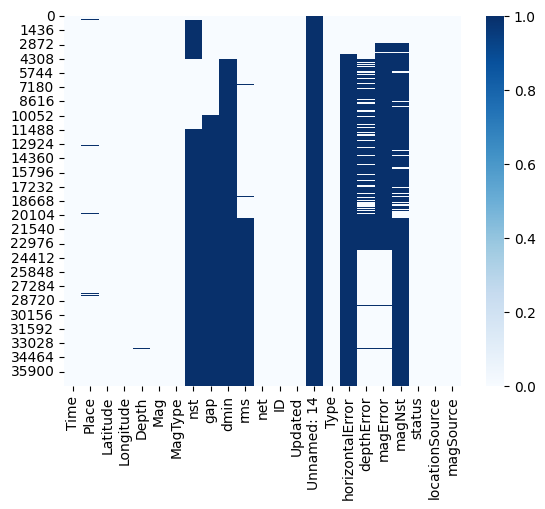

In [5]:
#Looking at each column and then finding the column with maximum number of missing values is tedious. For this reason, plotting a heatmap that will indicate all the missing values
sns.heatmap(earthquake_data.isnull(),cmap="Blues") #checking all columns with missing values

B. From this, it can be concluded that the columns "nst","gap","dmin","rms", Unnamed:14", horizontalError", "depthError", "magError" and "magNst" has a lot of missing values".
Hence, dropping these columns is better.

Since the aim of the project is to have prediction of the earthquake across the globe for country and year,
it is important to extract "Country" from the "Place" column and "Year" from the "Time" column.

Another conclusion that can be drawn from this dataset is that ID is unique for each row. Therefore, making ID as the index.

In [6]:
earthquake_data = earthquake_data.drop(columns=['nst', 'gap', 'dmin', 'rms', 'Unnamed: 14', 'horizontalError', 'depthError', 'magError', 'magNst'], errors='ignore') # Dropping columns with NaN values

#Extracting year from time
earthquake_data['Time'] = pd.to_datetime(earthquake_data['Time'])
earthquake_data['Year'] = earthquake_data['Time'].dt.year

#Extracting Month from time
earthquake_data['Month'] = earthquake_data['Time'].dt.month

#Extracting country from place
earthquake_data['Place'] = pd.Series(earthquake_data['Place'], dtype="string")
earthquake_data[['Place', 'Country']] = earthquake_data['Place'].str.rsplit(',', n=1, expand=True)
earthquake_data['Country'] = earthquake_data['Country'].str.strip()

earthquake_data = earthquake_data.dropna(subset=["Time", "Place", "Latitude", "Longitude", "Depth", "Mag", "MagType", "net", "ID", "Updated", "Type", "status", "locationSource", "magSource","Country","Year"]) #Dropping <NA> values in these columns

earthquake_data.head()

,Time,Place,Latitude,Longitude,Depth,Mag,MagType,net,ID,Updated,Type,status,locationSource,magSource,Year,Month,Country
0,2023-02-17 09:37:34.868000+00:00,130 km SW of Tual,-6.5986,132.0763,38.615,6.1,mww,us,us6000jpl7,2023-02-17T17:58:24.040Z,earthquake,reviewed,us,us,2023,2,Indonesia
1,2023-02-16 05:37:05.138000+00:00,7 km SW of Port-Olry,-15.0912,167.0294,36.029,5.6,mww,us,us6000jpb1,2023-02-17T05:41:32.448Z,earthquake,reviewed,us,us,2023,2,Vanuatu
2,2023-02-15 18:10:10.060000+00:00,Masbate region,12.3238,123.8662,20.088,6.1,mww,us,us6000jp76,2023-02-16T20:12:32.595Z,earthquake,reviewed,us,us,2023,2,Philippines
3,2023-02-15 06:38:09.034000+00:00,54 km WNW of Otaki,-40.5465,174.5709,74.320,5.7,mww,us,us6000jp1g,2023-02-16T06:42:09.738Z,earthquake,reviewed,us,us,2023,2,New Zealand
4,2023-02-14 13:16:51.072000+00:00,2 km NW of Lele?ti,45.1126,23.1781,10.000,5.6,mww,us,us6000jnqz,2023-02-17T09:15:18.586Z,earthquake,reviewed,us,us,2023,2,Romania


In [7]:
earthquake_data = earthquake_data.set_index('ID') #setting ID as index
earthquake_data.tail()

,Time,Place,Latitude,Longitude,Depth,Mag,MagType,net,Updated,Type,status,locationSource,magSource,Year,Month,Country
ID,,,,,,,,,,,,,,,,
iscgem16957826,1904-08-30 11:43:20.850000+00:00,150 km WNW of Kangding,30.684,100.608,15.0,7.09,mw,iscgem,2022-04-25T20:23:00.657Z,earthquake,reviewed,iscgem,iscgem,1904,8,China
iscgem16957819,1904-06-25 21:00:38.720000+00:00,115 km ESE of Petropavlovsk-Kamchatsky,52.763,160.277,30.0,7.70,mw,iscgem,2022-04-25T20:22:48.406Z,earthquake,reviewed,iscgem,iscgem,1904,6,Russia
iscgem16957820,1904-06-25 14:45:39.140000+00:00,274 km SE of Petropavlovsk-Kamchatsky,51.424,161.638,15.0,7.50,mw,iscgem,2022-05-09T22:48:24.972Z,earthquake,reviewed,iscgem,iscgem,1904,6,Russia
iscgem16957813,1904-04-04 10:26:00.880000+00:00,7 km SE of Stara Kresna,41.758,23.249,15.0,7.02,mw,iscgem,2022-04-26T14:54:31.433Z,earthquake,reviewed,iscgem,iscgem,1904,4,Bulgaria
iscgem610326271,1904-04-04 10:02:34.560000+00:00,6 km W of Stara Kresna,41.802,23.108,15.0,6.84,mw,iscgem,2022-04-25T20:36:18.723Z,earthquake,reviewed,iscgem,iscgem,1904,4,Bulgaria


In [8]:
# Making some changes to the column name in the same dataframe for easy identification
earthquake_data.rename(columns={'Mag': 'Magnitude', 'status': 'Status', 'magSource': 'Source'}, inplace=True)
# Getting stats about the dataframe
earthquake_data.describe()

,Latitude,Longitude,Depth,Magnitude,Year,Month
count,29572.000000,29572.000000,29572.000000,29572.000000,29572.000000,29572.000000
mean,11.564209,52.769416,55.738741,5.964253,1978.632118,6.540545
std,26.342428,119.534125,96.001524,0.462947,29.104526,3.428592
min,-57.295000,-179.989000,-4.000000,5.500000,1904.000000,1.000000
25%,-8.667500,-71.405000,15.000000,5.600000,1959.000000,4.000000
50%,7.991500,120.981000,32.000000,5.810000,1983.000000,7.000000
75%,36.324000,144.303250,44.900000,6.190000,2003.000000,10.000000
max,82.517000,179.989000,700.000000,9.200000,2023.000000,12.000000


Creating a separate dataset for web based interactive visualization

In [9]:
data = earthquake_data[earthquake_data['Year'] > 2021]
data.describe()

,Latitude,Longitude,Depth,Magnitude,Year,Month
count,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000
mean,6.570819,53.621457,61.056672,5.879567,2022.130031,5.594427
std,24.002583,112.002645,102.712099,0.437473,0.336859,3.571745
min,-44.621500,-178.674500,0.000000,5.500000,2022.000000,1.000000
25%,-13.731200,-68.411650,10.000000,5.600000,2022.000000,2.000000
50%,2.127700,107.613900,20.000000,5.700000,2022.000000,5.000000
75%,26.802600,141.111300,56.095000,6.000000,2022.000000,9.000000
max,78.581600,178.734900,622.730000,7.800000,2023.000000,12.000000


In [10]:
data.to_csv('earthquake_data.csv')

1. Historical analysis of the data :

Temporal Analysis is to examine the patterns / trends in the dataset over time.

Since we have a lots of data for the past few years, we can explore the pattern of earthquakes over the year and also over the month for certain year.

In [11]:
# 1. Earthquake counts by Year :
# creating a new data frame for earthquake count by year
eq_count = earthquake_data['Year'].value_counts().reset_index()

# Renaming the columns and sorting it by year
eq_count.columns = ['Year', 'Earthquake_Count']
eq_count = eq_count.sort_values(by = 'Year')

In [12]:
# Reference : https://plotly.com/python/horizontal-bar-charts/#bar-chart-with-line-plot

import plotly.graph_objects as go

#1.  Creating a line chart
trace = go.Scatter(
    x=eq_count['Year'],
    y=eq_count['Earthquake_Count'],
    mode='lines+markers',
    marker=dict(size=8, color='brown'),
    hoverinfo='text',
    text=[f'Year: {year}<br>Count: {count}' for year, count in zip(eq_count['Year'], eq_count['Earthquake_Count'])]
)


# Creating layout
layout = go.Layout(
    title='Earthquake Count by Year',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Earthquake Count'),
    hovermode='closest',
    plot_bgcolor='lightgray'
)

# Creating figure
fig = go.Figure(data=[trace], layout=layout)

# Show the figure
fig.show()


From the above plot, we can see the year **2011** has faced a lots of earthquakes.

We can examine month-wise pattern for that particular year below.

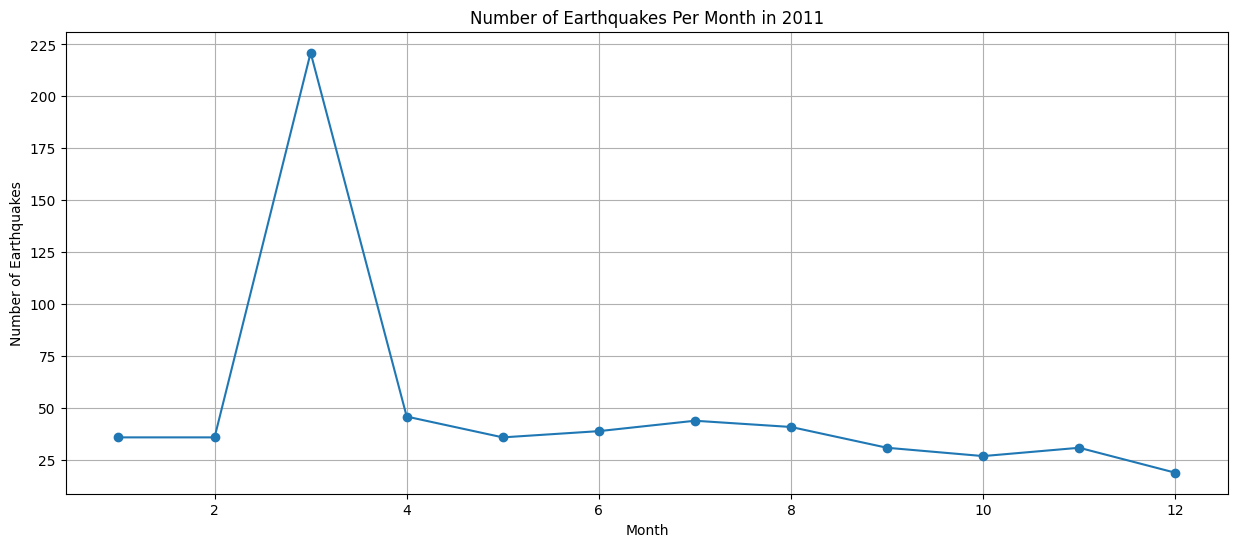

In [13]:
# Counting the number of earthquakes per month
earthquakes_per_month = earthquake_data.groupby(['Year', 'Month']).size()

# Plotting the number of earthquakes per month for a specific year (e.g., 2020)
plt.figure(figsize=(15, 6))
plt.plot(earthquakes_per_month.loc[2011].index, earthquakes_per_month.loc[2011].values, marker='o')
plt.title('Number of Earthquakes Per Month in 2011')
plt.xlabel('Month')
plt.ylabel('Number of Earthquakes')
plt.grid(True)
plt.show()

After the preliminary analysis of the historical data, we explore in depth for the year 2011 and the top 10 countries which got affected most.

In [14]:
# Exploring the particular year 2011 in depth
earthquake_data_2011 = earthquake_data[earthquake_data['Year'] == 2011]

# verifying the earthquake_data_2011 by listing the first few rows
earthquake_data_2011.head()

,Time,Place,Latitude,Longitude,Depth,Magnitude,MagType,net,Updated,Type,Status,locationSource,Source,Year,Month,Country
ID,,,,,,,,,,,,,,,,
usp000jcq2,2011-12-27 15:21:56.840000+00:00,45 km NNE of Saryg-Sep,51.842,95.911,15.0,6.6,mww,us,2022-04-08T20:25:09.055Z,earthquake,reviewed,us,us,2011,12,Russia
usp000jcnx,2011-12-26 16:12:33.210000+00:00,73 km NW of Isangel,-19.168,168.704,44.6,5.5,mww,us,2022-04-08T20:25:21.192Z,earthquake,reviewed,us,us,2011,12,Vanuatu
usp000jcna,2011-12-26 04:48:08.870000+00:00,27 km SSW of Hihifo,-16.198,-173.862,90.0,6.0,mww,us,2022-04-08T20:25:06.544Z,earthquake,reviewed,us,us,2011,12,Tonga
usp000jch9,2011-12-23 02:18:03.730000+00:00,8 km E of Christchurch,-43.530,172.743,6.9,5.9,mww,us,2022-04-08T20:24:49.032Z,earthquake,reviewed,wel,us,2011,12,New Zealand
usp000jch0,2011-12-23 00:58:38.310000+00:00,14 km ENE of Christchurch,-43.490,172.800,9.7,5.8,mww,us,2022-04-08T20:24:37.263Z,earthquake,reviewed,wel,us,2011,12,New Zealand


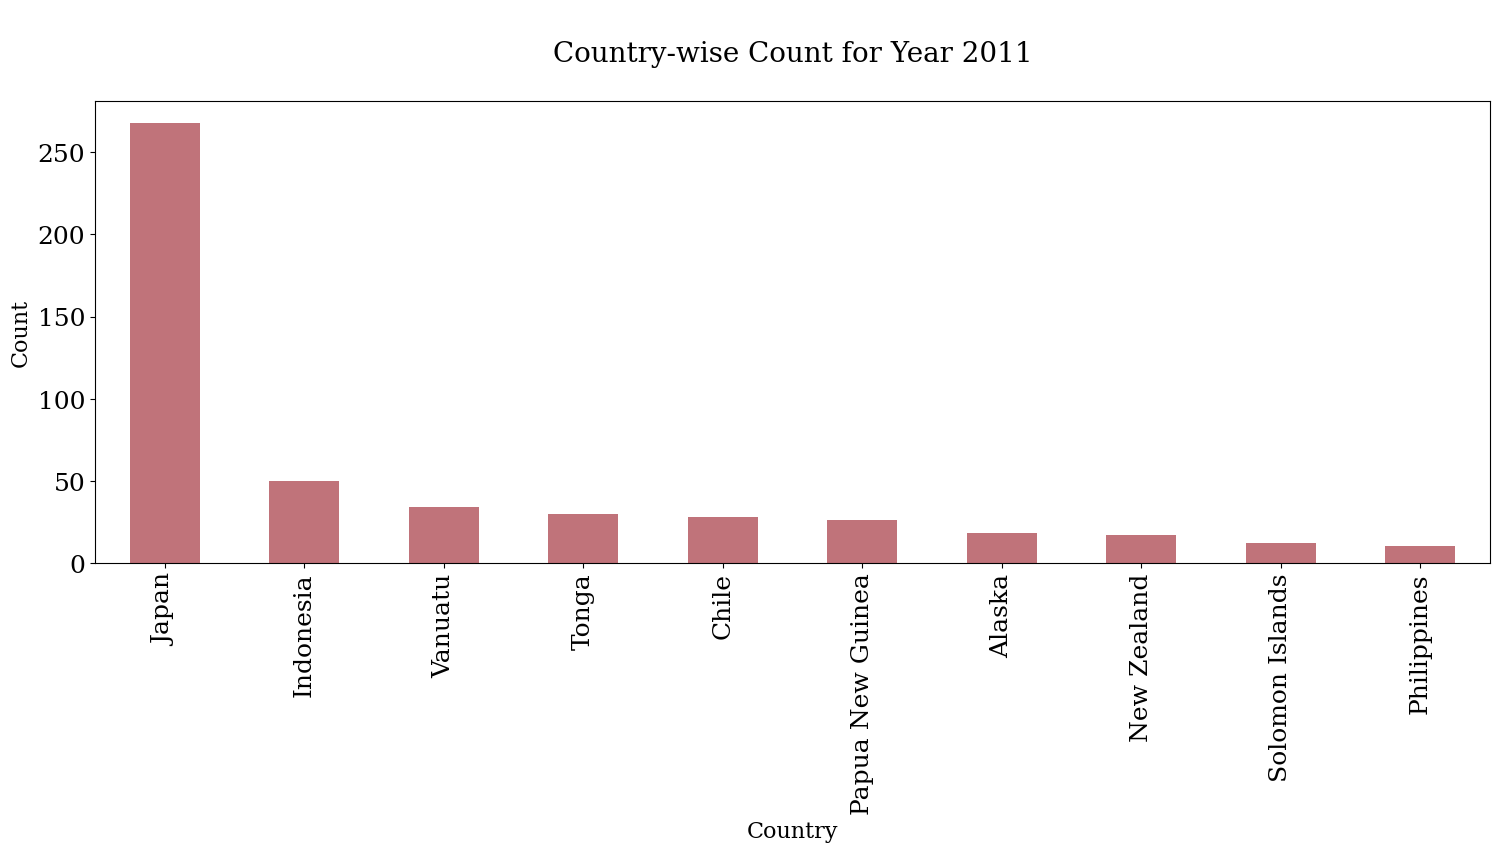

In [15]:
# plotting countrywise earthquake count for the year 2011
country_count_2011 = earthquake_data_2011['Country'].value_counts()

# plotting the top 10 country with most number of earthquakes
top_10_country_2011 = country_count_2011.head(10)

plt.figure(figsize = (18, 6))
plt.rcParams["font.family"] = "serif"

plt.xlabel('Country', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.title('\nCountry-wise Count for Year 2011\n', fontsize = 20)

top_10_country_2011.plot(kind = 'bar', color = "#c0737a", fontsize = 18)
plt.show()

From the bar plot which shows the top 10 country which got the most number of earthquakes in the year 2011. From that plot, we can understand that there is lots of differences in the earthquake count between Japan and other countries in that list.

Now we will explore the country Japan in depth to understand its Magnitude and Depth of the earthquake.


In [16]:
# creating a subset of data from the 2011 earthquake dataset to understand a little more
earthquake_data_2011_Japan = earthquake_data_2011.loc[earthquake_data_2011['Country'] == 'Japan']

# verifying the dataframe by listing the first few rows
earthquake_data_2011_Japan.head()

,Time,Place,Latitude,Longitude,Depth,Magnitude,MagType,net,Updated,Type,Status,locationSource,Source,Year,Month,Country
ID,,,,,,,,,,,,,,,,
usp000jbb8,2011-11-24 10:25:34.030000+00:00,53 km SSE of Shizunai-furukawach?,41.898,142.639,38.0,6.2,mww,us,2022-04-08T22:21:35.399Z,earthquake,reviewed,us,us,2011,11,Japan
usp000jbaf,2011-11-23 19:24:31.470000+00:00,35 km ESE of Namie,37.365,141.368,34.0,6.1,mww,us,2022-04-08T22:22:27.625Z,earthquake,reviewed,us,us,2011,11,Japan
usp000jajd,2011-11-08 02:59:08.510000+00:00,238 km WNW of Naha,27.324,125.621,224.9,6.9,mww,us,2022-04-08T22:11:03.762Z,earthquake,reviewed,us,us,2011,11,Japan
usp000ja40,2011-10-30 03:23:46+00:00,101 km N of Yonakuni,25.372,122.866,224.2,5.7,mwb,us,2022-04-08T22:11:13.545Z,earthquake,reviewed,us,us,2011,10,Japan
usp000j9mz,2011-10-21 08:02:37.950000+00:00,16 km NE of Asahikawa,43.892,142.479,187.0,6.1,mww,us,2022-04-08T22:08:34.181Z,earthquake,reviewed,us,us,2011,10,Japan


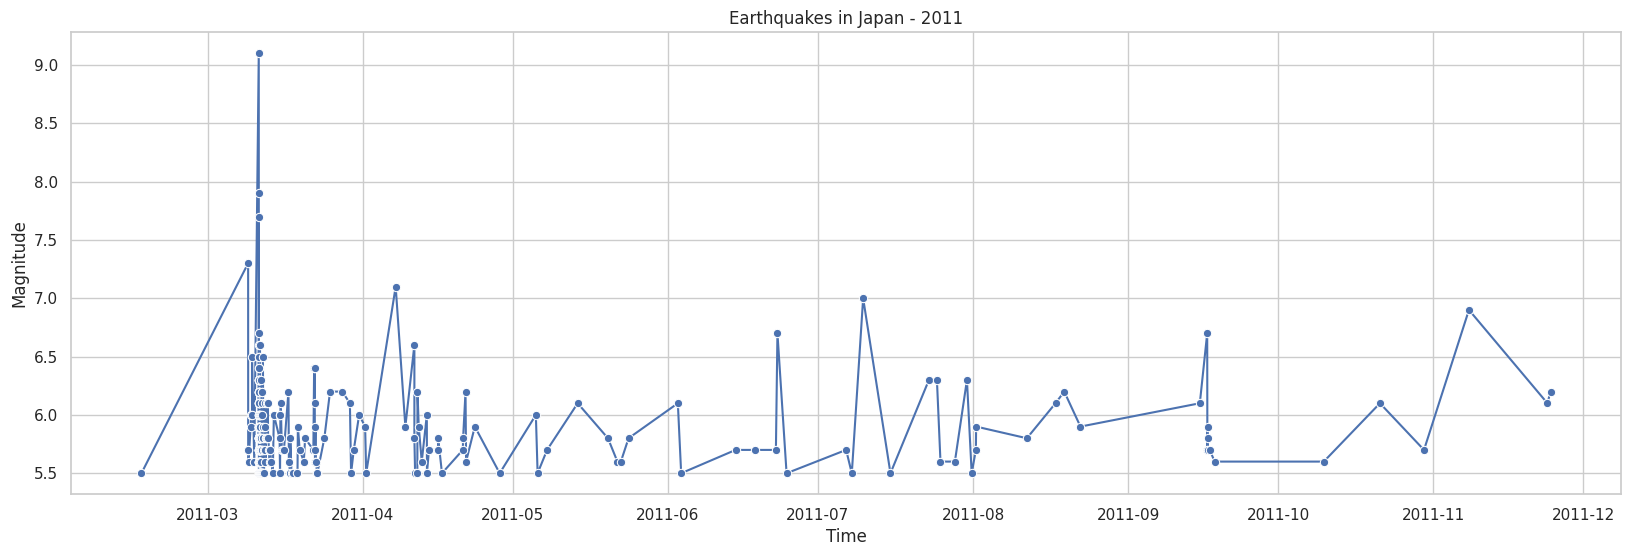

In [17]:
sns.set(style="whitegrid")

# Plotting with seaborn
plt.figure(figsize=(20, 6))
sns.lineplot(x='Time', y='Magnitude', data=earthquake_data_2011_Japan, marker='o', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Earthquakes in Japan - 2011')
plt.show()

<ipython-input-18-e08104f4dadd>:9: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



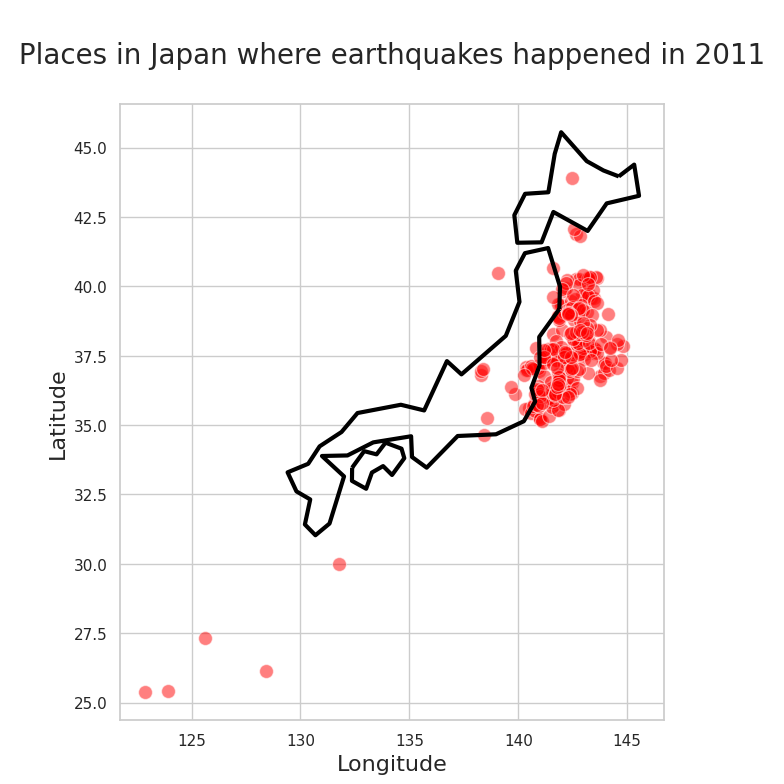

In [18]:
# Creating a list of pairs of latitude and longitude from the earthquake_data_2011_Japan dataset using Shapely Point object
listOfLatLong = [Point(xy) for xy in zip(earthquake_data_2011_Japan['Longitude'], earthquake_data_2011_Japan['Latitude'])]

# Create a GeoDataFrame with the values derived above
geo_df = gpd.GeoDataFrame(earthquake_data_2011_Japan, geometry = listOfLatLong)

# https://geopandas.org/en/stable/docs/reference/api/geopandas.datasets.get_path.html
# Reading the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# filtering only Japan from the world map
japan = world[world['name'] == 'Japan']

# Plotting the boundary of Japan
fig, ax = plt.subplots(figsize = (15, 8))
japan.boundary.plot(ax = ax, color = 'black', linewidth = 3)

plt.rcParams["font.family"] = "serif"
plt.xlabel('Longitude', fontsize = 16)
plt.ylabel('Latitude', fontsize = 16)
plt.title('\n Places in Japan where earthquakes happened in 2011 \n', fontsize = 20)

# Plotting earthquake points on top of Japan
sns.scatterplot(data = geo_df, x = 'Longitude', y = 'Latitude', color = 'red', marker = 'o', s = 100, alpha = 0.5)
plt.show()

2. Geographical Analysis of the dataset to identify high risk areas :

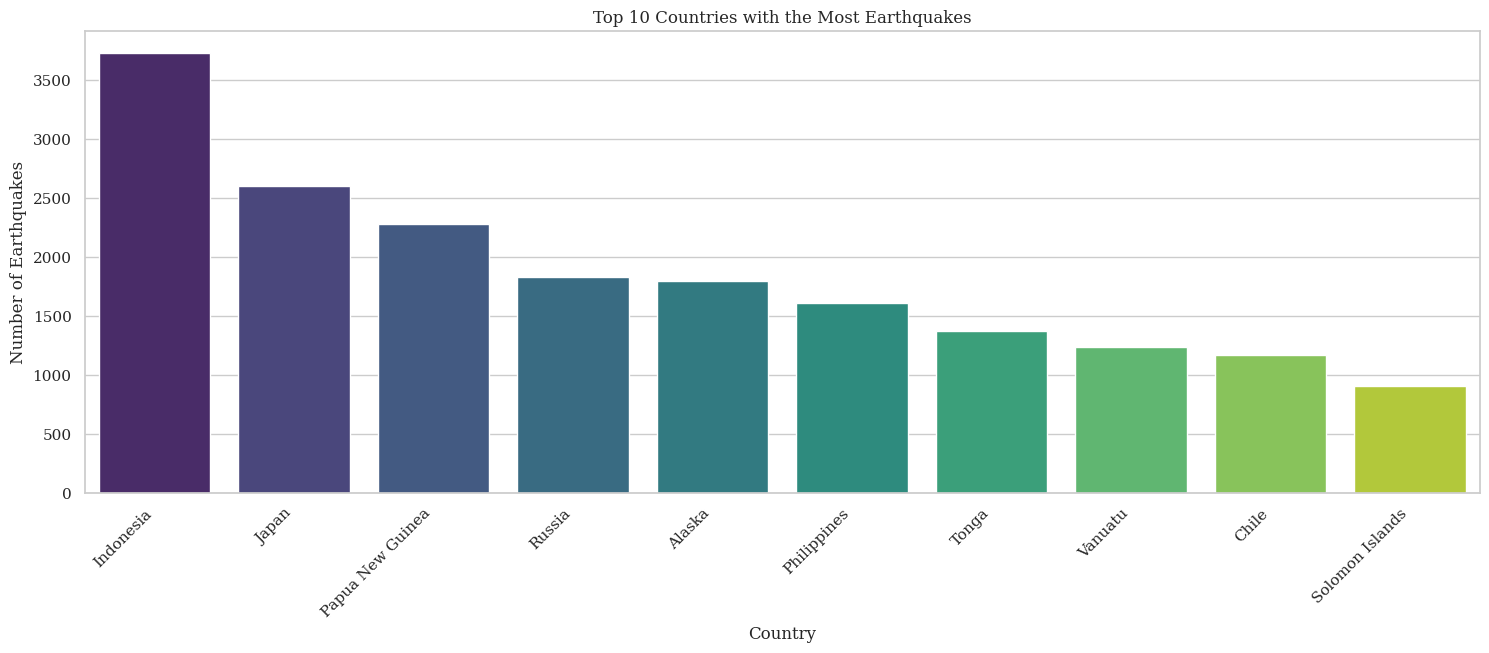

In [19]:
# computing the country count
country_counts = earthquake_data['Country'].value_counts()

# Selecting the top 10 countries
top_countries = country_counts.head(10)

# Plotting the count of earthquakes for the top 10 countries using Seaborn
plt.figure(figsize=(18, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title('Top 10 Countries with the Most Earthquakes')
plt.xlabel('Country')
plt.ylabel('Number of Earthquakes')
plt.xticks(rotation=45, ha='right')
plt.show()

From the plot above we can see that countries like Indonesia and Japan are more prone to get affected by earthquakes when compared to others.



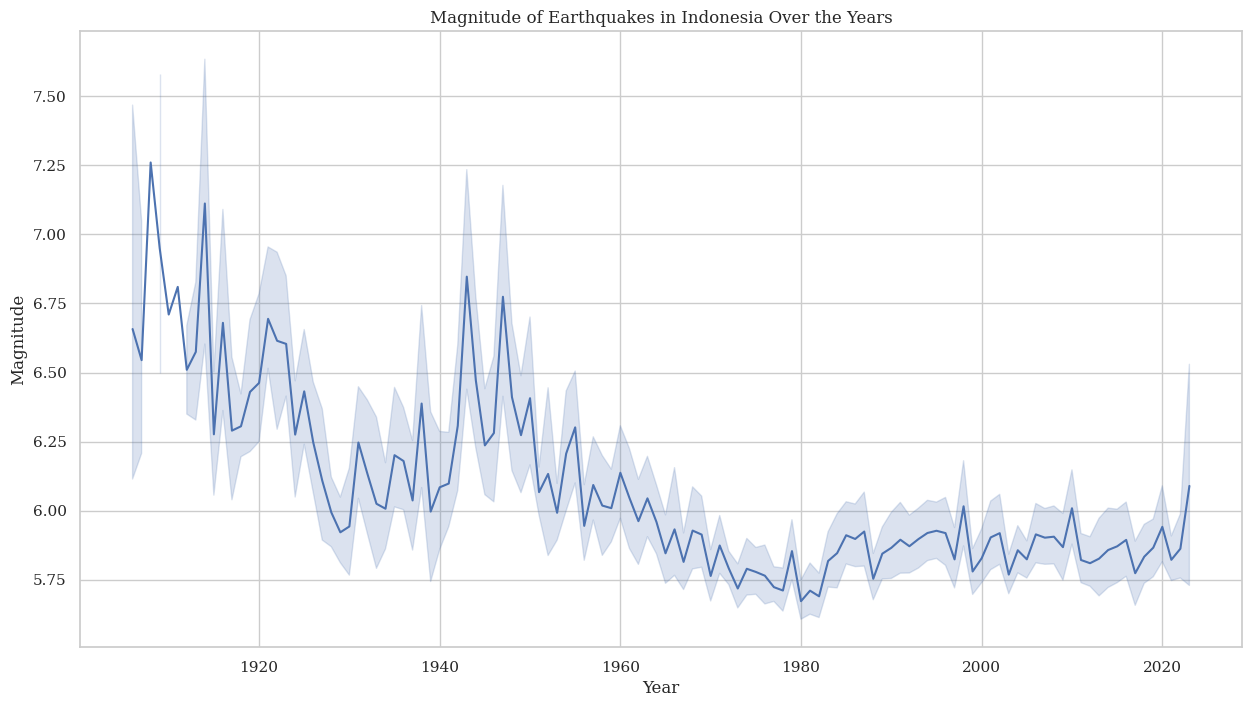

In [20]:
# Creating a subset for Country Indonesia
earthquake_data_indonesia = earthquake_data[earthquake_data['Country'] == 'Indonesia']

# Plotting the magnitude of earthquakes in Indonesia over the years
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='Magnitude', data=earthquake_data_indonesia)
plt.title('Magnitude of Earthquakes in Indonesia Over the Years')
plt.xlabel('Year')
plt.ylabel('Magnitude')
plt.show()


Even though Indonesia is the country which has the most number of earthquakes over the year, but the magnitude of the earthquake is not high when compared to Japan.

3. Analysis the average magnitude over years :

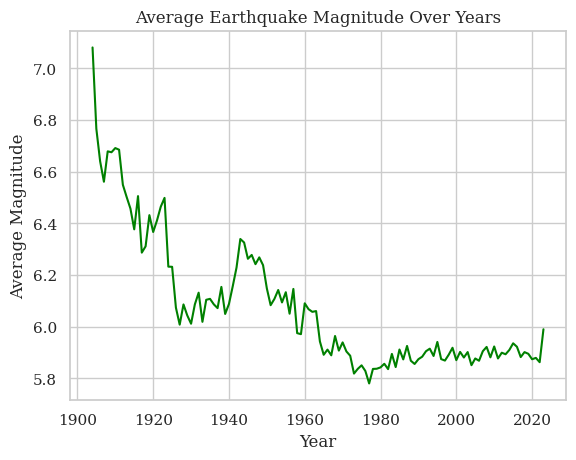

In [21]:
# 2. Plotting the distribution of earthquake magnitudes
# Grouping by year and calculating the average magnitude for each year
average_magnitude_by_year = earthquake_data.groupby('Year')['Magnitude'].mean()

# Average magnitude plot
plt.plot(average_magnitude_by_year.index, average_magnitude_by_year.values, color='green')
plt.title('Average Earthquake Magnitude Over Years')
plt.xlabel('Year')
plt.ylabel('Average Magnitude')

plt.show()


4. Overall distribution of the dataset using the geographical co-ordinates :

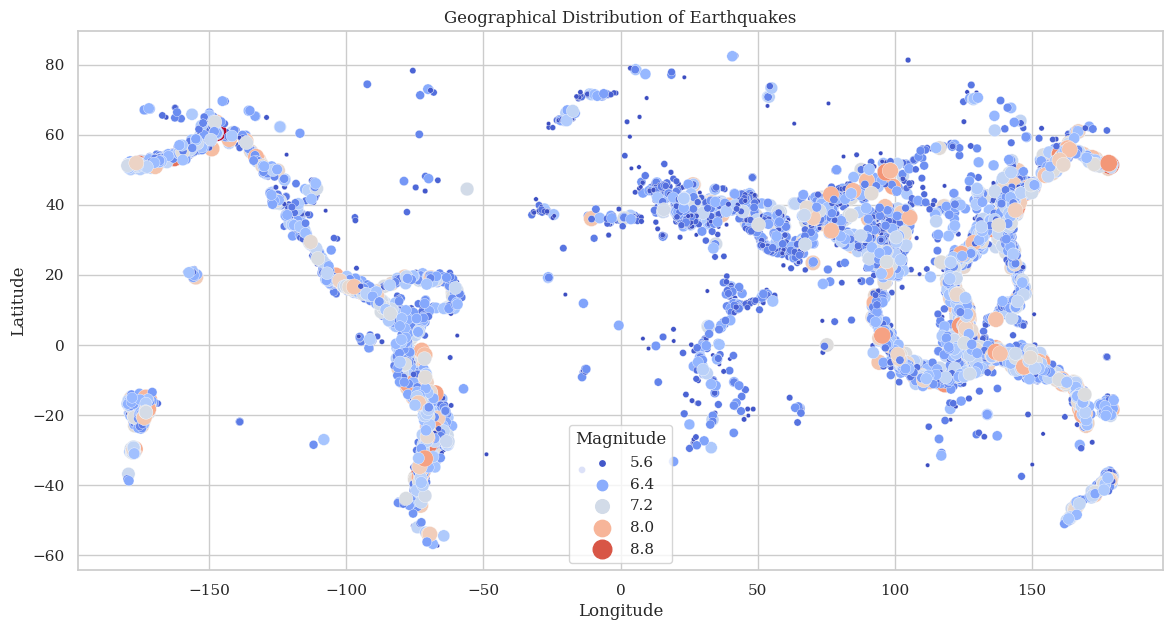

In [22]:
# 3. Plotting the geographical distribution of earthquakes
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Longitude', y='Latitude', hue='Magnitude', size='Magnitude',
                sizes=(10, 200), data=earthquake_data, palette='coolwarm', legend='brief')
plt.title('Geographical Distribution of Earthquakes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

4. Identifying the Deadliest Earthquakes Based on Magnitude and Location :

In [23]:
# 4. Identifying the Deadliest Earthquakes Based on Magnitude and Location
# For this analysis, we consider high magnitude earthquakes and their locations
high_magnitude_earthquakes = earthquake_data[earthquake_data['Magnitude'] >= 7.0]

# Displaying the top 10 deadliest earthquakes by magnitude
top_deadliest_earthquakes = high_magnitude_earthquakes.sort_values(by='Magnitude').tail()
top_deadliest_earthquakes[['Time', 'Place', 'Country', 'Magnitude']]

,Time,Place,Country,Magnitude
ID,,,,
official19650204050122_30,1965-02-04 05:01:22+00:00,"Rat Islands, Aleutian Islands",Alaska,8.7
official20100227063411530_30,2010-02-27 06:34:11.530000+00:00,36 km WNW of Quirihue,Chile,8.8
official19521104165830_30,1952-11-04 16:58:30+00:00,89 km ESE of Petropavlovsk-Kamchatsky,Russia,9.0
official20110311054624120_30,2011-03-11 05:46:24.120000+00:00,2011 Great Tohoku Earthquake,Japan,9.1
official19640328033616_30,1964-03-28 03:36:16+00:00,1964 Prince William Sound Earthquake,Alaska,9.2


D. The following can now be concluded:

(i). Most of the earthquakes across the globe has taken place in Asia

(ii) 2011 was the year with highest number of earthquakes in the world and Japan being on top

(iii) The most destructive Earthquake (in terms of magnitude) had taken place in Alaska


